In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 238MB/s]
100% 1.06G/1.06G [00:05<00:00, 219MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Generator

In [ ]:
train_dataset=keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.


In [ ]:
test_dataset=keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_dataset=train_dataset.map(process)
test_dataset=test_dataset.map(process)

# Making CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.5617 - loss: 2.4783 - val_accuracy: 0.6288 - val_loss: 0.6733
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.6921 - loss: 0.5935 - val_accuracy: 0.7460 - val_loss: 0.5301
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.7672 - loss: 0.4871 - val_accuracy: 0.7826 - val_loss: 0.4564
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8142 - loss: 0.4106 - val_accuracy: 0.5480 - val_loss: 1.2657
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8205 - loss: 0.4137 - val_accuracy: 0.8126 - val_loss: 0.4253
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8638 - loss: 0.3160 - val_accuracy: 0.8216 - val_loss: 0.4088
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9067 - loss: 0.2280 - val_accuracy: 0.7518 - val_loss: 0.8766
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.9371 - loss: 0.1627 - 

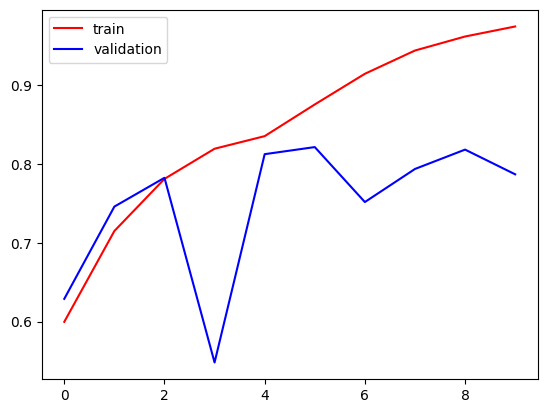

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'],color='red',label='train')
plt.plot(result.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

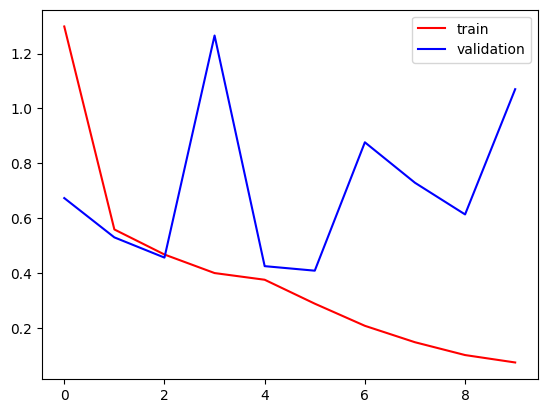

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'],color='red',label='train')
plt.plot(result.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **way to reduce overfitting**
# 1.Add more data
# 2.Data augmentation
# 3.L1/L2 Regularizer
# 4.Dropout
# 5.Batch Norm
# 6.Reduce Complexity

In [ ]:
 import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpg')

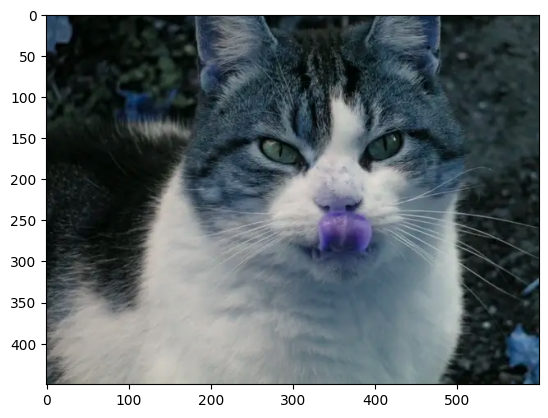

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(450, 600, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)